# 얼굴 인식 API
- 졸음 감지 등에 사용
- https://github.com/ageitgey/face_recognition

# 1. 사전 작업

## 1.1필요한 라이브러리
> imutils
> dlib
- 얼굴인식 표준 라이브러리를 모아놓은 패키지
- 파이썬 3.6에서만 실행
- 컴파일된 파일 받기
- https://pypi.org/simple/dlib/
- dlib-19.8.1-cp36-cp36m-win_amd64.whl 받기
- FaceAnalsys 폴더로 이동해서
- pip instal dlib-19.8.1-cp36-cp36m-win_amd64.whl
- 자동으로 아나콘다 폴더에 site-packages에 설치됨

> face_recognition
- pip install --no-dependencies face_recognition
- no dependenceis 안하면 dlib을 또 받아서 에러남

## 1.2. 가상환경(3.6)
- conda create -n py36 python=3.6 anaconda
- conda activate py36

!pip install git+https://github.com/ageitgey/face_recognition_models

# Face
## 얼굴 인식

> DB
- 처음: ORL이용
- 중간: 스카프,안경,마스크, AR 데이터베이스
- 조명, 포즈
- 최근: 모두 컨트롤된 환경에서 촬영-> 실세계 기반

> 먼저 얼굴 검출후
- 평균 shape을 얼굴 근처에 갖다 놓고 정확한 점 찾기
- edge 찾는 문제 아님

> 얼굴 특징점 68개 찾기
- 무조건 68개의 점을 찾음
- 모든 얼굴에서 항상 어떤 점을 코 끝을 의미
- 번호마다 정확하게 매핑되는 점이 있음.

In [6]:
from imutils import face_utils
import numpy as np
import imutils
import dlib  # 검출기에 초점
import cv2
import matplotlib.pyplot as plt
import face_recognition  # dlib기반 검출기 + 이식
import os
from imutils import paths

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

# 2. face_recognition api로 얼굴 검출

## 2.1. HOG 알고리즘으로 검출

I found 8 face(s) in this photograph.


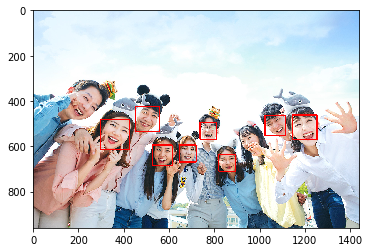

In [13]:
img = cv2.imread("./images/group.jpg")

face_locations = face_recognition.face_locations(img)

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:    
    top, right, bottom, left = face_location
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", img) 

## 2.1. cnn알고리즘으로 검출

I found 10 face(s) in this photograph.


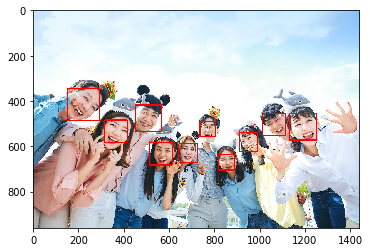

In [12]:
img = cv2.imread("./images/group.jpg")

# face_locations = face_recognition.face_locations(img)

# CNN 기반으로 얼굴 검출 할때는(굉장히 정교하게 찾음. 단점은 느림)
face_locations = face_recognition.face_locations(img, model='cnn')

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:    
    top, right, bottom, left = face_location
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", img) 

# 3. dlib안에 있는 검출 기능 사용
- svm 사용: 파라미터가 적기 때문에 학습 데이터가 패키지 안에 들어가있음

## 3.1. scaning 방법
> 이전: 피부색으로 검출
- 모든 이미지를 스캔할 필요가 없음
- 사람이 많을 때는 성능이 안좋음
- 스캐닝 방법을  상상할 수 없었음(연산량 많음)

> 지금: 스캐닝 방법
- 얼울을 gray로 사용해서 검출

In [62]:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

# 사람 검출할 때 썻던 알고리즘 HOG알고리즘 

In [63]:
frame = cv2.imread("./images/group.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)  # bom의 좌표 (사람수마다)

Number of faces detected: 8
[(821, 637) (893, 709)]
[(300, 480) (424, 604)]
[(534, 592) (621, 678)]
[(640, 582) (726, 669)]
[(726, 496) (813, 582)]
[(1143, 466) (1268, 590)]
[(438, 411) (563, 535)]
[(1024, 467) (1110, 553)]


In [64]:
for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        # 찾은 box 마다 포인트(특징점) 추출-
        # 구체적인 shape좌표 추출
        shape = predictor(gray, # 영상
                          d # 좌표
                         )
        shape = face_utils.shape_to_np(shape)
        for (x, y) in shape:
            cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)

Detection 0: Left: 821 Top: 637 Right: 893 Bottom: 709
Detection 1: Left: 300 Top: 480 Right: 424 Bottom: 604
Detection 2: Left: 534 Top: 592 Right: 621 Bottom: 678
Detection 3: Left: 640 Top: 582 Right: 726 Bottom: 669
Detection 4: Left: 726 Top: 496 Right: 813 Bottom: 582
Detection 5: Left: 1143 Top: 466 Right: 1268 Bottom: 590
Detection 6: Left: 438 Top: 411 Right: 563 Bottom: 535
Detection 7: Left: 1024 Top: 467 Right: 1110 Bottom: 553


<img src=./images/facial_landmarks_68markup-768x619.jpg width=200>

In [69]:
# 좌표 정보
print(rects[0]) 
shape = predictor(gray,rects[0])
print(shape) # 좌표 정보를 갖고 있는 오브젝트
shape = face_utils.shape_to_np(shape)
print(len(shape)) # 우리가 알 수 있는 좌표로 변환


[(54, 54) (141, 141)]
68


## 3.2 눈만 그리기

In [70]:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

# 사람 검출할 때 썻던 알고리즘 HOG알고리즘 

In [71]:
frame = cv2.imread("./images/face3.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)  # bom의 좌표 (사람수마다)

Number of faces detected: 1
[(54, 54) (141, 141)]


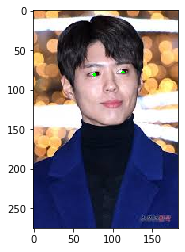

In [72]:
eye1 = np.mean(shape[36:42], axis = 0)
eye2 = np.mean(shape[42:48], axis = 0)
cv2.circle(frame, (int(eye1[0]), int(eye1[1])), 2, (0, 255, 0), -1)   
cv2.circle(frame, (int(eye2[0]), int(eye2[1])), 2, (0, 255, 0), -1)   

imshow('', frame)

In [73]:
frame = cv2.imread("./images/face.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)

    
 # d: 좌표 정보   
for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for (x, y) in shape:
          cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)

Number of faces detected: 0


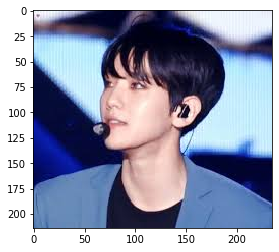

In [23]:
plt.imshow( cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [74]:
frame = cv2.imread("./images/face3.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)

    
    
for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for (x, y) in shape:
          cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)

Number of faces detected: 1
[(54, 54) (141, 141)]
Detection 0: Left: 54 Top: 54 Right: 141 Bottom: 141


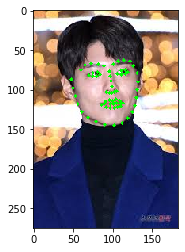

In [75]:
plt.imshow( cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 4. 얼굴 하나를 128차원의 실수값으로 만들기(고유한 특징값) 
- 얼굴을 찾은 뒤
- 얼굴에서 중요한 특징점을 128개의 실수값으로 만들기(1차원 벡터)
- 얼굴 크기에는 상관없음.

In [81]:
img = face_recognition.load_image_file("./images/face3.jpg")
face_encoding = face_recognition.face_encodings(img)
print(face_encoding[0].shape)

(128,)
